In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### Import the data.

In [2]:
pod_num = 'cham_3'

In [3]:
file = 'pod_files/cham3_coll.csv'
df_K = pd.read_table(file, sep='\s+', parse_dates=[[1, 2]], index_col=0)
df_K = df_K.rename(columns={'∂TempIN': 'Temp'})
df_K = df_K.rename(columns={'o3': 'e2v03'})
df_K = df_K.rename(columns={'RhIN': 'Rh'})

IOError: File pod_files/cham3_coll.csv does not exist

# Import the data

In [52]:
df_K = pd.io.parsers.read_csv(filepath_or_buffer = 'data/cham3_coll1.csv', parse_dates = [0], index_col = 0)

In [53]:
df_K.head()

,UnixTime,o3,no2,TempIN,RhIN
YYYY/MM/DD_HH:MM:SS,,,,,
2014-07-17 17:55:52,1405619752,608,874,36.2,23.3
2014-07-17 17:55:57,1405619757,608,874,36.1,23.3
2014-07-17 17:56:02,1405619762,608,873,36.2,23.3
2014-07-17 17:56:06,1405619766,608,873,36.2,23.2
2014-07-17 17:56:11,1405619771,608,873,36.2,23.2


In [36]:
# df_K.drop(df_K.columns[[0,2,3,6,7,10,11,12,13]], axis=1, inplace=True)
# print df_K[:5]

#### Enter the column number you'd like to evaluate.

In [42]:
#col = raw_input('Enter the column you would like to inspect: ')
col = 'no2'

#### Define a function, called unique_column_values, that displays every unique value in the selected column.

In [43]:
def unique_column_values(df,column_name):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    print column_name, df[column_name].unique()

#### Call the unique_column_values function for column of the data that you want to evaluate. Look at the data and make sure there aren't any obvious outliers.


In [44]:
unique_column_values(df_K,col)

no2 [998 993 990 987 984 983 981 979 978 976 975 974 972 970 969 968 967 966
 965 964 963 962 961 960 958 957 956 955 954 953 952 951 950 949 948 947
 945 944 943 942 941 940 939 938 937 936 935 934 932 931 930 929 928 927
 926 925 924 923 922 921 920 919 918 917 916 915 914 913 912 911 910 908
 907 906 905 904 903 902 901 900 899 898 897 896 895 894 893 892 891 890
 889 888 887 886 885 883 881 880 879 878 877 876 875 874 873 872 871 870
 869 868 867 866 865 864 863 862 861 860 859 858 857 856 855 854 853 852
 851 850 849 848 847 846 845 844 843 842 841 840 839 838 837 836 835 834
 833 832 831 830 829 828 827 826 825 824 823 822 821 820 819 818 817 816
 815 814 813 812 811 810 809 808 807 806 805 804 803 802 801 800 799 798
 797 796 795 794 793 792 791 790 789 788 787 786 785 784 783 782 781 780
 779 778 777 776 775 774 773 772 771 770 769 768 767 766 764 765 763 762
 761 760 759 758 757 756 755 754 753 752 751 750 749 748 747 746 745 744
 743 742 741 740 739 738 737 736 735 734 733 73

#### Define a function, column_plot, that gives you a plot of all of the data on one column. Look for outliers.

In [45]:
def column_plot(df, column_name, time_chunk):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    print column_names
    #xlim = ['2014-07-27 0:00:00', '2014-7-28 0:00:00' ]
    #xlim = assign_pod_calibration_times(pod_num, time_chunk)
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    df[column_name].plot(marker = '.',figsize = (20,10), legend = True)
    #, xlim = xlim

#### Call the function, column_plot, using the column of the data that you want to plot.

Index([u'UnixTime', u'o3', u'no2', u'TempIN', u'RhIN'], dtype='object')


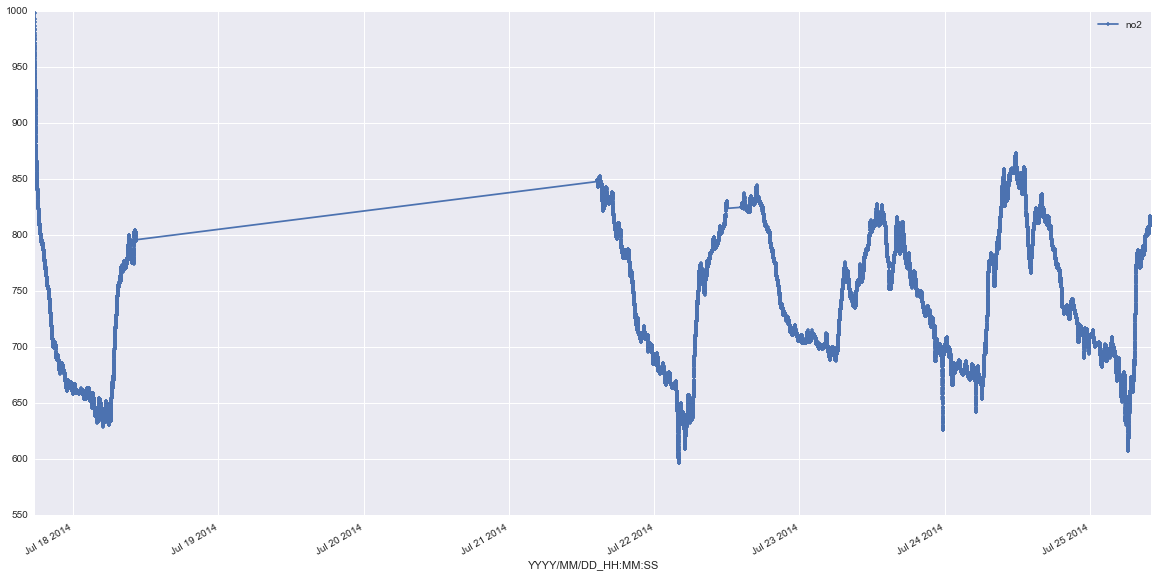

In [46]:
column_plot(df_K, col, 1)

## You can stop here and move on the the next column if you don't see any outliers!!!!

#### Define a function, remove_data_above, that removes data above a specified value.

In [18]:
def remove_data_above(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] < n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

#### Define a function, remove_data_below, that removes data below a specified value.

In [19]:
def remove_data_below(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] > n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

#### Call the function, remove_data_above, to remove data above a certain value, by entering (df_K,col,value).

In [49]:
df_K = remove_data_above(df_K, col, 875)

no2 [874 873 872 871 870 869 868 867 866 865 864 863 862 861 860 859 858 857
 856 855 854 853 852 851 850 849 848 847 846 845 844 843 842 841 840 839
 838 837 836 835 834 833 832 831 830 829 828 827 826 825 824 823 822 821
 820 819 818 817 816 815 814 813 812 811 810 809 808 807 806 805 804 803
 802 801 800 799 798 797 796 795 794 793 792 791 790 789 788 787 786 785
 784 783 782 781 780 779 778 777 776 775 774 773 772 771 770 769 768 767
 766 764 765 763 762 761 760 759 758 757 756 755 754 753 752 751 750 749
 748 747 746 745 744 743 742 741 740 739 738 737 736 735 734 733 732 731
 730 729 728 727 726 725 724 723 722 721 720 719 718 717 716 715 714 713
 712 711 710 709 708 707 706 705 704 703 702 701 700 699 698 697 696 695
 694 693 692 691 690 689 688 687 686 685 684 683 682 681 680 679 678 677
 676 675 674 673 672 671 670 669 668 667 666 665 664 663 662 661 660 659
 658 657 656 655 654 653 652 651 650 649 648 647 646 645 644 643 642 641
 640 639 638 637 636 635 634 633 632 631 630 62

#### Call the function, remove_data_below, to remove data below a certain value, by entering (df_K,col,value).

In [14]:
df_K = remove_data_below(df_K, col, 4)

o3_ppb [ 38.  43.  46.  49.  44.  42.  35.  36.  37.  39.  17.  19.  20.  18.  15.
  13.  11.   8.   5.   7.   6.  10.  23.  21.   9.  14.  16.  25.  31.  34.
  29.  22.  24.  27.  33.  12.  30.  26.  32.  28.  47.  50.  61.  62.  60.
  58.  57.  55.  54.  52.  41.  51.  56.  66.  59.  64.  53.  40.  45.  63.
  65.  68.  67.  69.  70.  48.  79.  78.  77.  75.  71.  73.  74.  82.  83.
  84.  81.  72.  80.  87.  76.  85.  89.  86.]


#### Replot the data to see how well the cleaning worked.

Index([u'UnixTime', u'o3', u'no2', u'TempIN', u'RhIN'], dtype='object')


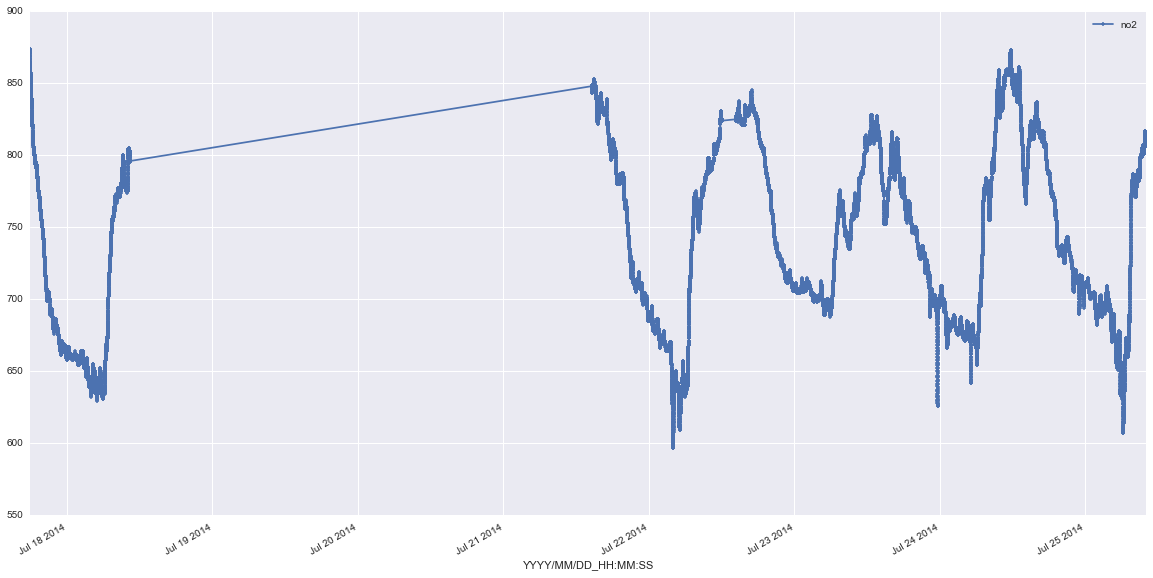

In [50]:
column_plot(df_K, col, 2)

#### Go back and clean the data again if necessary.

#### Otherwise, write the new dataframe to a file. Do this after cleaning each row, so that if you make a mistake with a row, you don't have to reclean all of the other rows.

In [51]:
df_K.to_csv(path_or_buf = 'data/cham3_coll1.csv')